In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Legend
output_notebook()

Loading BokehJS ...

In [2]:
# Default Matplotlib Plot of Dataframe Column 
def dfplot(df, col, cond_col="", cond_val=0):
    if cond_col != "":
        c = df[df[cond_col] == cond_val]
        s = c[pd.isnull(c[col]) == False][col]
    else:
        s = df[pd.isnull(df[col]) == False][col]
    s.plot(figsize=(15,5))
    plt.title(col)
    plt.show()

# Sum of Dataframe Column
def dfsum(df, col, cond_col="", cond_val=0):
    if cond_col != "":
        total = df[df[cond_col] == cond_val][col].sum()
    else:
        total = df[col].sum()
    return total

# Matplotlib Histogram of Value Counts in Dataframe Column
def dfplotvc(df, col, cond_col="", cond_val=0):
    if cond_col != "":
        vc = df[df[cond_col] == cond_val][col].value_counts()
    else:
        vc = df[col].value_counts()
    plt.clf()
    plt.figure(figsize=(15,8))
    vc.plot(kind='bar')
    plt.show()  

# Interactive Bokeh Plot of Dataframe Column
# ... note that x axis is a recreated list of item number
# ... and does not reflect original index in dataframe
def dfbokeh(df, col, cond_col="", cond_val=0):
    p = figure(title=col, plot_height=300, plot_width=600)
    if cond_col != "":
        c = df[df[cond_col] == cond_val]
        s = c[pd.isnull(c[col]) == False][col]
    else:
        s = df[pd.isnull(df[col]) == False][col]
    y = s.values
    x = [i for i in range(len(y))]
    r = p.line(x, y, color="#2222aa", line_width=3)
    show(p, notebook_handle=True)

# Creates a QtDialog for Opening a File (local only)
def openfile_dialog():
    from PyQt5 import QtGui
    from PyQt5 import QtGui, QtWidgets
    app = QtWidgets.QApplication([dir])
    fname = QtWidgets.QFileDialog.getOpenFileName(None, "Select a file...", '.', filter="All files (*)")
    return fname

In [ ]:
# For environments that support Qt Dialog run the following
#   execute the lines below to select a file that is read into the dataframe

# csvfile = openfile_dialog()
# df = pd.read_csv(csvfile[0])

In [3]:
# For environments that support local file access
#   copy the desired data file into the same directory as this ipynb notebook as "perf.csv"
#   then execute the line below to read the file into the dataframe

df = pd.read_csv("perf.csv")

In [4]:
df.head()

,time,bidir,new,retran,ack
0,0,0,16,0,0
1,1,0,32,0,0
2,2,0,48,0,0
3,3,0,64,0,0
4,4,0,80,0,0


In [5]:
df.tail()

,time,bidir,new,retran,ack
595,595,1,4736,3000,4656
596,596,1,4752,3000,4656
597,597,1,4768,3000,4656
598,598,1,4784,3000,4656
599,599,1,4800,3000,4656


In [6]:
df.describe()

,time,bidir,new,retran,ack
count,600.000000,600.000000,600.00000,600.000000,600.000000
mean,299.500000,0.500000,1304.00000,2171.200000,1168.000000
std,173.349358,0.500417,1477.30929,1025.913279,1525.462463
min,0.000000,0.000000,16.00000,0.000000,0.000000
25%,149.750000,0.000000,200.00000,1372.000000,0.000000
50%,299.500000,0.500000,200.00000,2808.000000,8.000000
75%,449.250000,1.000000,2404.00000,3000.000000,2296.000000
max,599.000000,1.000000,4800.00000,3000.000000,4656.000000


In [10]:
# Display a slice of dataframe
df[1:5]

,time,bidir,new,retran,ack
1,1,0,32,0,0
2,2,0,48,0,0
3,3,0,64,0,0
4,4,0,80,0,0


In [11]:
# Display all rows in dataframe that have certain values in them
# ... in this case, all rows where bidirectional is true
df[df["bidir"].isin([1])]

,time,bidir,new,retran,ack
300,300,1,200,2816,16
301,301,1,200,2832,16
302,302,1,200,2848,16
303,303,1,200,2864,16
304,304,1,200,2880,16
305,305,1,200,2896,16
306,306,1,200,2912,16
307,307,1,200,2928,16
308,308,1,200,2944,16
309,309,1,200,2960,16


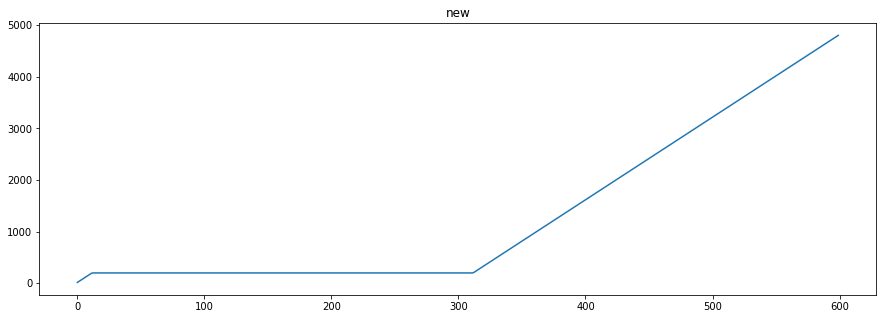

In [12]:
# Plot a column
dfplot(df, 'new')

from bokeh.models import Legend

In [41]:
# Create an interactive plot of a column
p = figure(title="perf", plot_height=400, plot_width=900)
p.legend.location = "top_left"
p.legend.click_policy="hide"

# time
x = df["time"].values

# create plot lines
r_n = p.line(x, df["new"].values, color="blue", line_width=1)
r_r = p.line(x, df["retran"].values, color="red", line_width=1)
r_a = p.line(x, df["ack"].values, color="green", line_width=1)


legend = Legend(items=[ ("New", [r_n]), ("Retransmitted", [r_r]), ("Acknowledged", [r_a])], location=(0, 250))
p.add_layout(legend, 'center')

# display plot
show(p, notebook_handle=True)